In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

### Generating data

In [4]:
X = np.array([np.random.random_sample(250),np.random.random_sample(250)])

In [5]:
Y = np.sin(2*np.pi*X[0])*np.sin(2*np.pi*X[1]) + np.random.normal(0,0.1,250)

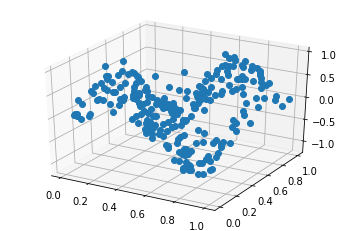

In [6]:
plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

xline = X[0]
yline = X[1]
zline = Y
ax.plot3D(xline, yline, zline,'o')

In [10]:
def f_phi(module,s=1):
    return np.e**(-module**2 / s**2)

In [11]:
M = 4
MU = np.array([np.random.uniform(0,1,M), np.random.uniform(0,1,M)])

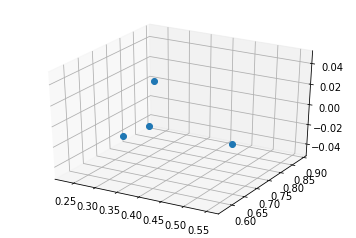

In [12]:
MU_null = np.zeros(M)
plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(MU[0], MU[1], MU_null, 'o')

In [13]:
MUt = MU.T
Xt = X.T
Yt = Y.T

In [14]:
PHI = np.zeros((len(Xt),M))

for i in range(len(Xt)):
    for j in range(M):
        module = np.linalg.norm((Xt[i] - MUt[j]))**2
        PHI[i][j] = f_phi(module)

In [15]:
W = ((np.linalg.inv(PHI.T@PHI))@PHI.T)@Yt
W.shape

Y_pred = W@PHI.T

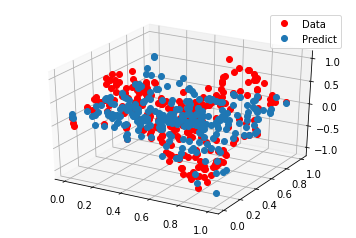

In [16]:
plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

xline = X[0]
yline = X[1]
zline = Y
ax.plot3D(xline, yline, zline,'ro',label='Data')
ax.plot3D(xline, yline, Y_pred,'o',label='Predict')
plt.legend()

In [48]:
sample_size = int(1e5)

In [49]:
X = np.array([np.random.random_sample(sample_size),np.random.random_sample(sample_size)])

In [50]:
Y = np.sin(2*np.pi*X[0])*np.sin(2*np.pi*X[1]) + np.random.normal(0,0.1,sample_size)

In [63]:
def linear_regression(x_data,y_data,M):
    
    Xt = x_data.T
    Yt = y_data.T
    
    def f_phi(module,s=1):
        return np.e**(-module**2 / s**2)
    
    #MU = np.linspace(0,1,M)
    #MUx,MUy = np.meshgrid(MU,MU)
    #MU = np.array([MUx,MUy])
    #MU_null = np.zeros(M)
    np.random.seed(0)
    MU = np.array([np.random.uniform(0,1,M), np.random.uniform(0,1,M)])
    MUt = MU.T
    
    PHI = np.zeros((len(Xt),M))

    for i in range(len(Xt)):
        for j in range(M):
            module = np.linalg.norm((Xt[i] - MUt[j]))**2
            PHI[i][j] = f_phi(module)
    
    W = ((np.linalg.inv(PHI.T@PHI))@PHI.T)@Yt
    
    Y_pred = W@PHI.T
    
    return Y_pred,W

In [64]:
aux,W = linear_regression(X,Y,10)

[]
[0.00018641]
[ 0.17990732 -0.18280612]
[ 0.85756323  0.7487076  -1.60814537]
[-50.34807593 -17.92567229  62.61416133   5.78592995]
[  6.62916367   6.66632457 -27.96548036  20.53699913  -5.6700356 ]
[-44.39335015 -17.70072963  13.44204671  22.87594067  -0.63567468
  26.46121629]
[-108.91238109   15.44177484   11.89633294   81.56092056  -20.89804483
  -14.51993713   35.78836953]
[ 22.24216903  -0.95547693  -2.9144234    9.85690975  -5.91084823
 -22.43824306  -3.49264024   4.0391205 ]
[ 11.8354649   -4.15146818  12.21601652 -20.95510601   6.84378455
   0.44444557  -6.9495197    3.48048089  -2.54569466]
[  6.51617148   6.55348432 -11.89513118  -4.51471666   6.81704069
   8.90265225 -14.02042379  -7.66920979   3.59519871   5.26979353]
[ 47.36100299 -61.3790024  -22.62426234  33.10186194 -39.66618554
   4.47449177 -19.1712441   44.17269928 -30.85252502  23.88655747
  20.42435145]
[  21.86016504  -32.27410696   35.77649612  -11.87546575  -20.83547645
   50.31697475 -160.43579596   11.59926

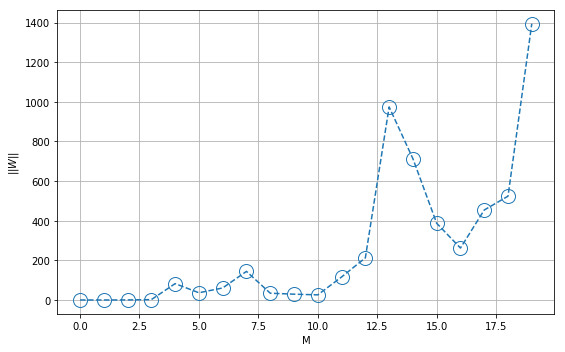

In [65]:
L = 20

#E_rms = np.zeros(L)

W_plt = np.zeros(L)

M_plt = np.zeros(L)

for i in range(L):
    M_plt[i] = i
    aux,W = linear_regression(X,Y,i)
    #E_rms[i] = (sum((aux - Y) ** 2) / len(aux)) ** 0.5
    print(W)
    W_plt[i] = np.linalg.norm(W)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
#plt.title('With Pseudo-Inverse')
plt.plot(M_plt,W_plt, 'o--', markerfacecolor="None", ms=14)
plt.xlabel('M')
plt.ylabel('$||W||$')
#plt.ylim((0,0.8))
plt.tight_layout()
plt.grid()